# Operaciones con Series y Dataframes

## Ordenación de  valores

La ordenación de los datos por algún criterio es una operación muy habitual cuando se trata de analizar datos. El método `sort_index` de los `DataFrame` ordena lexicográficamente los índices de  un dataframes en base a cualquiera de sus índices.

In [17]:
import numpy as np
import pandas as pd

datos_1 = np.array([[ 1000, 3000],
       [ 5000, 1000],
       [ 4200, 6000],
       [ 5000, 5500]])
t1 = pd.DataFrame(datos_1, columns= ('Gastos', 'Ingresos'),
                  index = [2006, 2002, 2005, 2007])

t1

,Gastos,Ingresos
2006,1000,3000
2002,5000,1000
2005,4200,6000
2007,5000,5500


Para ordenar los valores de una serie o un dataframe usamos el método `sort_values`. En el caso de los dataframes, es necesario indicar las columnas (mediante una lista) por las que queremos ordenar en el argumento `by`. 

In [18]:
t1.sort_values(by = ['Gastos'], ascending = False)

,Gastos,Ingresos
2002,5000,1000
2007,5000,5500
2005,4200,6000
2006,1000,3000


Por defecto, la ordenación es ascendente en todas las columnas, pudiendo indicar otro orden mediante una lista de valores de tipo `bool` en el argumento `ascending`.

In [19]:
t1.sort_values(by = ['Gastos', 'Ingresos'] , ascending = [True, False])

,Gastos,Ingresos
2006,1000,3000
2005,4200,6000
2007,5000,5500
2002,5000,1000


Como resultado obtenemos un nuevo dataframe ordenado de forma ascendente en cuanto a la columna Gastos y descendente en cuanto a la columna Ingresos.

## Tratamiento de valores NaN

Resulta bastante habitual cuando se trabaja con datos, encontrarse con valores vacíos o desconocidos. Ya hemos comentado anteriormente que estos valores se identifican con `NaN`(Not a Number). Aunque Pandas es capaz de tratar este tipo de valores de forma implícita, resulta de mucha utilidad conocer las herramientas que proporciona Pandas para su manejo.

Por un lado, es posible asignar valores `NaN` de forma explícita usando el valor `np.nan` de la librería `NumPy`.

In [20]:
s3 = pd.Series([1, np.nan, 2], index = ['A', 'B', 'C'])

In [21]:
s3

A    1.0
B    NaN
C    2.0
dtype: float64

Una de las opciones para eliminar masivamente estos valores, es usar el método `dropna`. El resultado es una nueva estructura de datos sin valores `NaN`.

In [22]:
s3.dropna()

A    1.0
C    2.0
dtype: float64

In [23]:
s3

A    1.0
B    NaN
C    2.0
dtype: float64

En el caso de dataframes, los valores `NaN` pueden estar distribuídos en varias columnas. 

In [24]:
t3 = pd.DataFrame( data = [ ('España', 'ES', 46449, np.nan), 
                            ('Alemania', np.nan , np.nan, np.nan),
                            ('Japón', 'JP', 55555, '2005') ],
                       columns =  ['País', 'Código', 'Pob.', 'Año'])
t3

,País,Código,Pob.,Año
0,España,ES,46449.0,NaN
1,Alemania,NaN,NaN,NaN
2,Japón,JP,55555.0,2005


La operación `dropna` eliminará todas las filas y todas las columnas que tengan algún valor `NaN`.

In [25]:
t3.dropna(axis = 1)

,País
0,España
1,Alemania
2,Japón


Para eliminar aquellas filas en las que los valores de todas las columnas son `NaN`, usamos las opciones `axis` y `how` con valores `0` y  `all` respectivamente.

In [26]:
t3.dropna(how = 'all', axis = 0 )

,País,Código,Pob.,Año
0,España,ES,46449.0,NaN
1,Alemania,NaN,NaN,NaN
2,Japón,JP,55555.0,2005


En los casos en los no deseamos eliminar datos con valores `NaN`, Pandas ofrece la posibilidad de sustituir dichos  valores por un valor por defecto. Para ello usamos el método `fillna` junto con el valor a sustituir.

In [27]:
t3.fillna(0)

,País,Código,Pob.,Año
0,España,ES,46449.0,0
1,Alemania,0,0.0,0
2,Japón,JP,55555.0,2005


También es posible indicar un valor por defecto distinto para cada columna. En ese caso,  usaremos un diccionario como argumento del método `fillna`. Las claves del diccionario serán las etiquetas del índice de las columnas afectadas y el valor asociado a cada una de las claves, será el valor por defecto que sustituye a `NaN`.

In [28]:
d = {'País': 'ZZ', 'Código': 'QQQQQQQ', 'Pob.': 0}
t3.fillna(d)

,País,Código,Pob.,Año
0,España,ES,46449.0,NaN
1,Alemania,QQQQQQQ,0.0,NaN
2,Japón,JP,55555.0,2005


## Relación entre variables: Correlación 

Entre las operaciones estadísticas más comunes se encuentran la correlación y la covarianza. Estas operaciones se representan en Pandas mediante los métodos `corr` y `cov` respectivamente. Ambos métodos se encuentran definidos tanto para las  `Series` como para los   `DataFrame`. Así, es posible calcular la correlación entre cualquier par de columnas de un dataframe, obteniéndose lo que se denomina una matriz de correlación.

In [29]:
datos = [[40, 58, 115],
       [ 43, 59, 117],
       [ 41, 60, 120],
       [ 38, 61, 120],
       [ 36, 62, 126],
       [ 40, 63, 122]]

In [30]:
t5 = pd.DataFrame(datos, columns = ['Edad', 'Peso', 'Altura'])
t5

,Edad,Peso,Altura
0,40,58,115
1,43,59,117
2,41,60,120
3,38,61,120
4,36,62,126
5,40,63,122


In [32]:
mcorr = t5.corr()
mcorr

,Edad,Peso,Altura
Edad,1.000000,-0.529641,-0.708300
Peso,-0.529641,1.000000,0.861444
Altura,-0.708300,0.861444,1.000000


In [33]:
a = mcorr.values
a

array([[ 1.        , -0.5296409 , -0.70830021],
       [-0.5296409 ,  1.        ,  0.86144352],
       [-0.70830021,  0.86144352,  1.        ]])

La matriz de correlación se puede representar mediante un mapa de calor como se muestra a continuación. Utilizamos la función `heatmap` de la librería Seaborn.

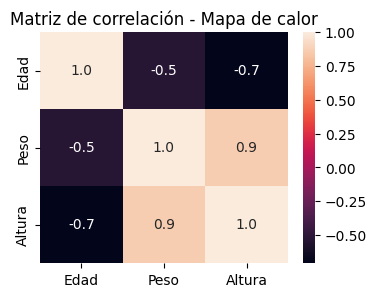

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(1, figsize=(4, 3))

sns.heatmap(mcorr, vmax=1, square=False, annot=True, fmt='.1f')
ax.set_title('Matriz de correlación - Mapa de calor');


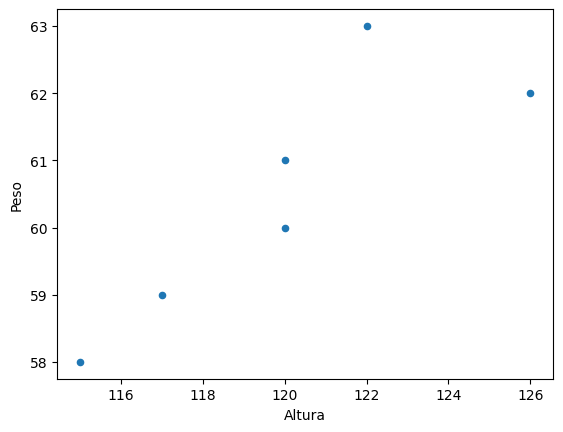

In [35]:
t5.plot(kind='scatter', x='Altura', y='Peso');
plt.xlabel('Altura')
plt.ylabel('Peso');

De la misma forma, es posible calcular la correlación entre un par de columnas (correlación entre dos series).

In [26]:
t5['Edad'].corr(t5['Altura'])

-0.7083002112022763

## Referencias

* [Big Data. Análisis de datos con Python. Sarasa Cabezuelo, Antonio; García Ruiz, Yolanda Aditorial Garceta. ISBN: 978-84-1622-883-6](http://www.garceta.es/libro.php?ISBN=978-84-1622-883-6)
* [Python Data Analysis Library](http://pandas.pydata.org/)
* [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)

-----